Processed 2mm_#001.txt: wx = 6194.43, wy = 6080.63
Processed 2.5mm_#001.txt: wx = 5917.65, wy = 5824.39
Processed 3mm_#001.txt: wx = 5616.55, wy = 5535.25
Processed 4mm_#001.txt: wx = 4997.37, wy = 4866.89
Processed 5mm_#001.txt: wx = 4328.79, wy = 4146.23
Processed 5.5mm_#001.txt: wx = 3969.91, wy = 3760.88
Processed 5.75mm_#001.txt: wx = 3785.49, wy = 3568.14
Processed 6mm_#001.txt: wx = 3599.19, wy = 3376.73
Processed 6.25mm_#001.txt: wx = 3406.52, wy = 3176.28
Processed 6.5mm_#001.txt: wx = 3199.9, wy = 2974.82
Processed 6.75mm_#001.txt: wx = 2992.04, wy = 2768.99
Processed 7mm_#001.txt: wx = 2782.59, wy = 2565.12
Processed 7.25mm_#001.txt: wx = 2568.45, wy = 2364.07
Processed 7.5mm_#001.txt: wx = 2348.17, wy = 2159.8
Processed 7.75mm_#001.txt: wx = 2126.03, wy = 1954.46
Processed 8mm_#001.txt: wx = 1906.73, wy = 1753.21
Processed 8.25mm_#001.txt: wx = 1690.22, wy = 1550.07
Processed 8.6mm_#001.txt: wx = 1383.71, wy = 1261.01
Processed 8.7mm_#001.txt: wx = 1295.47, wy = 1178.52
Pro

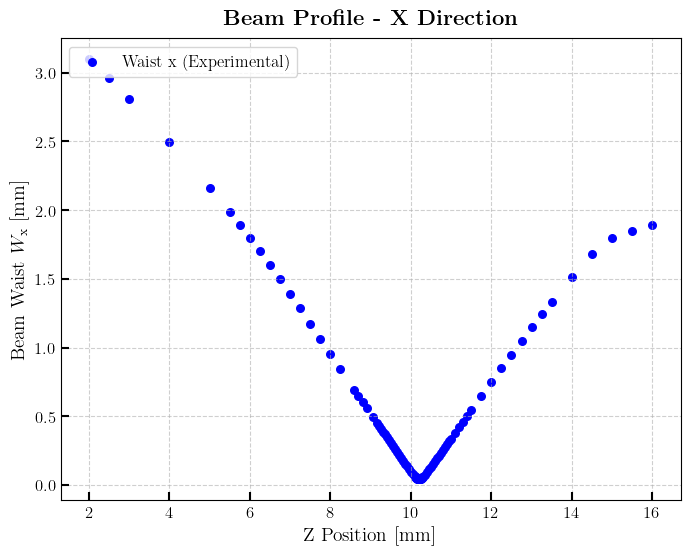

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251016_telescoping/fig/beam_profile_y.png


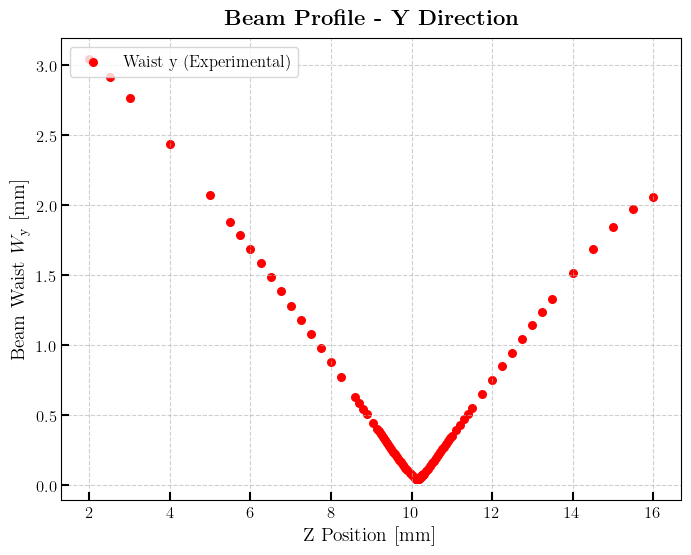

In [33]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251016_telescoping"
# Match both *mm_#001.txt and *m_#001.txt
file_list = sorted(
    [f for f in glob.glob(os.path.join(data_path, "*[m|mm]_#001.txt"))
     if "before lens" not in os.path.basename(f).lower() and
     float(os.path.basename(f).split('m')[0].strip()) <= 16],
    key=lambda f: float(os.path.basename(f).split('m')[0])
)
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    # Split on 'm' to handle both 'mm' and 'm'
    z_str = filename.split('m')[0].strip()
    try:
        z = float(z_str)
    except ValueError:
        print(f"Error: Invalid z value in filename {filename}. Skipping.")
        continue
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
                print(f"Processed {filename}: wx = {gaussian_dia_x}, wy = {gaussian_dia_y}")
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping line.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    # Convert diameters to radii (µm to mm)
    wx = gaussian_dia_x / 2 / 1000
    wy = gaussian_dia_y / 2 / 1000
    
    z_values.append(z)
    width_x.append(wx)
    width_y.append(wy)

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort data by z
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to µm) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251016_telescoping/fig/beam_profile_x_zoomed.png


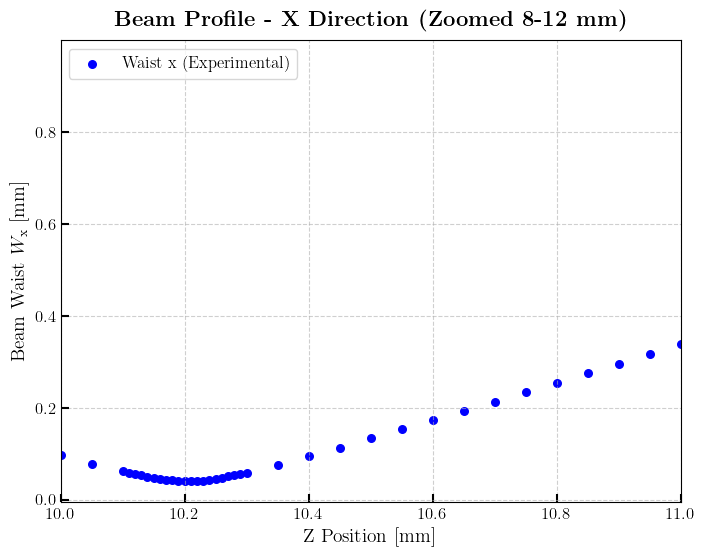

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251016_telescoping/fig/beam_profile_y_zoomed.png


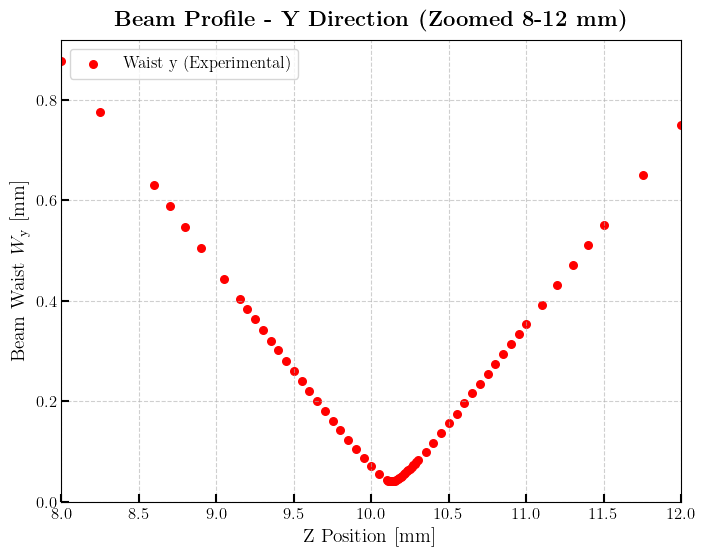

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Filter data for z between 8 and 12 mm
mask = (z_values >= 8) & (z_values <= 12)
z_zoom = z_values[mask]
width_x_zoom = width_x[mask]
width_y_zoom = width_y[mask]

# Plot Width x vs. z (zoomed)
plt.figure(figsize=(8, 6))
plt.scatter(z_zoom, width_x_zoom, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - X Direction (Zoomed 8-12 mm)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(10, 11)
#plt.ylim(min(width_x_zoom) * 0.95, max(width_x_zoom) * 1.05)  # Add 5% padding to y-axis
save_beam_x_zoom = os.path.join(fig_dir, "beam_profile_x_zoomed.png")
plt.savefig(save_beam_x_zoom, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x_zoom}")
plt.show()

# Plot Width y vs. z (zoomed)
plt.figure(figsize=(8, 6))
plt.scatter(z_zoom, width_y_zoom, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - Y Direction (Zoomed 8-12 mm)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(8, 12)
#plt.ylim(min(width_y_zoom) * 0.95, max(width_y_zoom) * 1.05)  # Add 5% padding to y-axis
save_beam_y_zoom = os.path.join(fig_dir, "beam_profile_y_zoomed.png")
plt.savefig(save_beam_y_zoom, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y_zoom}")
plt.show()

### FITTING THE BEAM PROFILE TO ESTIMATE DIVERGENCE ANGLE

Total fit

Processed 2mm_#001.txt: wx = 6194.43, wy = 6080.63
Processed 2.5mm_#001.txt: wx = 5917.65, wy = 5824.39
Processed 3mm_#001.txt: wx = 5616.55, wy = 5535.25
Processed 4mm_#001.txt: wx = 4997.37, wy = 4866.89
Processed 5mm_#001.txt: wx = 4328.79, wy = 4146.23
Processed 5.5mm_#001.txt: wx = 3969.91, wy = 3760.88
Processed 5.75mm_#001.txt: wx = 3785.49, wy = 3568.14
Processed 6mm_#001.txt: wx = 3599.19, wy = 3376.73
Processed 6.25mm_#001.txt: wx = 3406.52, wy = 3176.28
Processed 6.5mm_#001.txt: wx = 3199.9, wy = 2974.82
Processed 6.75mm_#001.txt: wx = 2992.04, wy = 2768.99
Processed 7mm_#001.txt: wx = 2782.59, wy = 2565.12
Processed 7.25mm_#001.txt: wx = 2568.45, wy = 2364.07
Processed 7.5mm_#001.txt: wx = 2348.17, wy = 2159.8
Processed 7.75mm_#001.txt: wx = 2126.03, wy = 1954.46
Processed 8mm_#001.txt: wx = 1906.73, wy = 1753.21
Processed 8.25mm_#001.txt: wx = 1690.22, wy = 1550.07
Processed 8.6mm_#001.txt: wx = 1383.71, wy = 1261.01
Processed 8.7mm_#001.txt: wx = 1295.47, wy = 1178.52
Pro

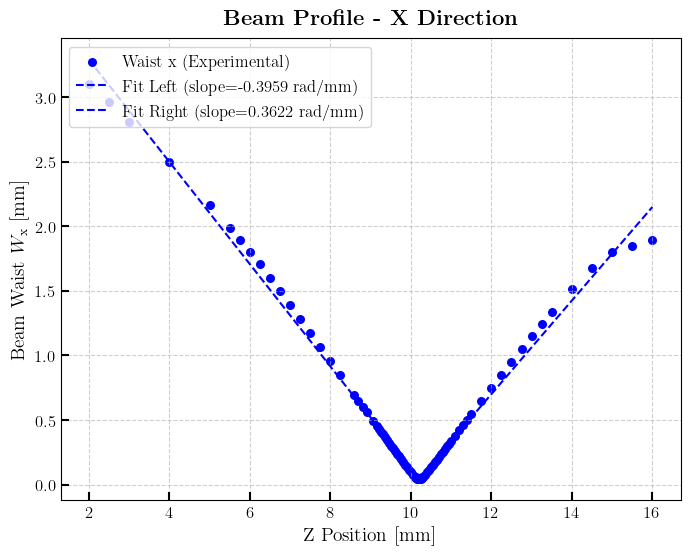

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251016_telescoping/fig/beam_profile_y.png


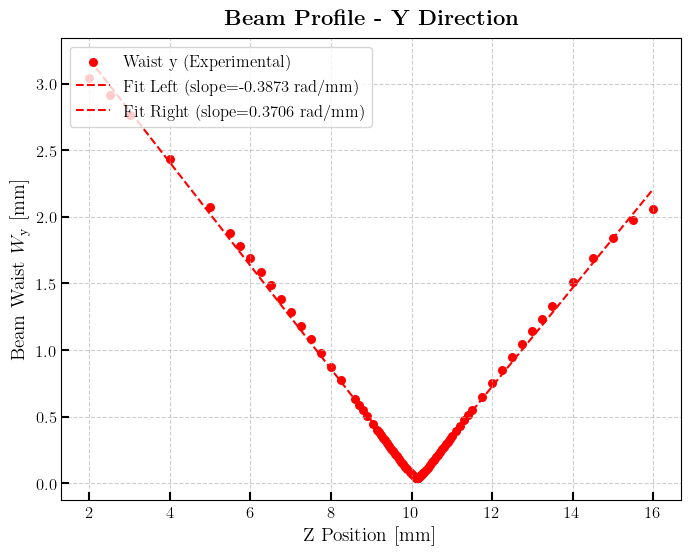

In [54]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251016_telescoping"
# Match both *mm_#001.txt and *m_#001.txt
file_list = sorted(
    [f for f in glob.glob(os.path.join(data_path, "*[m|mm]_#001.txt"))
     if "before lens" not in os.path.basename(f).lower() and
     float(os.path.basename(f).split('m')[0].strip()) <= 16],
    key=lambda f: float(os.path.basename(f).split('m')[0])
)
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    # Split on 'm' to handle both 'mm' and 'm'
    z_str = filename.split('m')[0].strip()
    try:
        z = float(z_str)
    except ValueError:
        print(f"Error: Invalid z value in filename {filename}. Skipping.")
        continue
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
                print(f"Processed {filename}: wx = {gaussian_dia_x}, wy = {gaussian_dia_y}")
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping line.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    # Convert diameters to radii (µm to mm)
    wx = gaussian_dia_x / 2 / 1000
    wy = gaussian_dia_y / 2 / 1000
    
    z_values.append(z)
    width_x.append(wx)
    width_y.append(wy)

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort data by z
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to µm) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")

# Linear fits for X direction
min_idx_x = np.argmin(width_x)
z_left_x = z_values[:min_idx_x]
width_x_left = width_x[:min_idx_x]
z_right_x = z_values[min_idx_x:]
width_x_right = width_x[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction
min_idx_y = np.argmin(width_y)
z_left_y = z_values[:min_idx_y]
width_y_left = width_y[:min_idx_y]
z_right_y = z_values[min_idx_y:]
width_y_right = width_y[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Plot Width x vs. z with linear fits
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
plt.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z with linear fits
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
plt.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Variable range fit (from z = 6mm to z = 14mm)

Processed 2mm_#001.txt: wx = 6194.43, wy = 6080.63
Processed 2.5mm_#001.txt: wx = 5917.65, wy = 5824.39
Processed 3mm_#001.txt: wx = 5616.55, wy = 5535.25
Processed 4mm_#001.txt: wx = 4997.37, wy = 4866.89
Processed 5mm_#001.txt: wx = 4328.79, wy = 4146.23
Processed 5.5mm_#001.txt: wx = 3969.91, wy = 3760.88
Processed 5.75mm_#001.txt: wx = 3785.49, wy = 3568.14
Processed 6mm_#001.txt: wx = 3599.19, wy = 3376.73
Processed 6.25mm_#001.txt: wx = 3406.52, wy = 3176.28
Processed 6.5mm_#001.txt: wx = 3199.9, wy = 2974.82
Processed 6.75mm_#001.txt: wx = 2992.04, wy = 2768.99
Processed 7mm_#001.txt: wx = 2782.59, wy = 2565.12
Processed 7.25mm_#001.txt: wx = 2568.45, wy = 2364.07
Processed 7.5mm_#001.txt: wx = 2348.17, wy = 2159.8
Processed 7.75mm_#001.txt: wx = 2126.03, wy = 1954.46
Processed 8mm_#001.txt: wx = 1906.73, wy = 1753.21
Processed 8.25mm_#001.txt: wx = 1690.22, wy = 1550.07
Processed 8.6mm_#001.txt: wx = 1383.71, wy = 1261.01
Processed 8.7mm_#001.txt: wx = 1295.47, wy = 1178.52
Pro

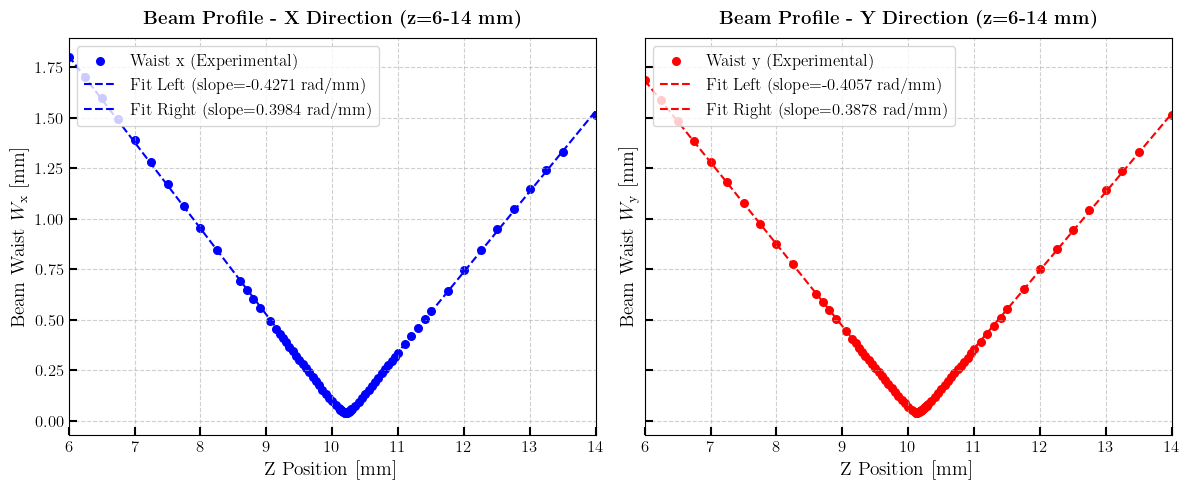

In [55]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251016_telescoping"
# Match both *mm_#001.txt and *m_#001.txt
file_list = sorted(
    [f for f in glob.glob(os.path.join(data_path, "*[m|mm]_#001.txt"))
     if "before lens" not in os.path.basename(f).lower() and
     float(os.path.basename(f).split('m')[0].strip()) <= 16],
    key=lambda f: float(os.path.basename(f).split('m')[0])
)
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    # Split on 'm' to handle both 'mm' and 'm'
    z_str = filename.split('m')[0].strip()
    try:
        z = float(z_str)
    except ValueError:
        print(f"Error: Invalid z value in filename {filename}. Skipping.")
        continue
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
                print(f"Processed {filename}: wx = {gaussian_dia_x}, wy = {gaussian_dia_y}")
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping line.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    # Convert diameters to radii (µm to mm)
    wx = gaussian_dia_x / 2 / 1000
    wy = gaussian_dia_y / 2 / 1000
    
    z_values.append(z)
    width_x.append(wx)
    width_y.append(wy)

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort data by z
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Filter data for z between 6 and 14 mm
mask = (z_values >= 6) & (z_values <= 14)
z_values_filtered = z_values[mask]
width_x_filtered = width_x[mask]
width_y_filtered = width_y[mask]

print(f"Processed {len(z_values_filtered)} valid data points in range 6-14 mm out of {len(z_values)} total files.")

# Print filtered data
for z, wx, wy in zip(z_values_filtered, width_x_filtered, width_y_filtered):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Linear fits for X direction (filtered range)
min_idx_x = np.argmin(width_x_filtered)
z_left_x = z_values_filtered[:min_idx_x]
width_x_left = width_x_filtered[:min_idx_x]
z_right_x = z_values_filtered[min_idx_x:]
width_x_right = width_x_filtered[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction (filtered range)
min_idx_y = np.argmin(width_y_filtered)
z_left_y = z_values_filtered[:min_idx_y]
width_y_left = width_y_filtered[:min_idx_y]
z_right_y = z_values_filtered[min_idx_y:]
width_y_right = width_y_filtered[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Create comparison plots in a single canvas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_filtered, width_x_filtered, color='b', label='Waist x (Experimental)', marker='o', s=30)
ax1.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
ax1.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile - X Direction (z=6-14 mm)}', fontsize=13.5, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_xlim(6, 14)

# Plot Width y comparison
ax2.scatter(z_values_filtered, width_y_filtered, color='r', label='Waist y (Experimental)', marker='o', s=30)
ax2.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
ax2.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile - Y Direction (z=6-14 mm)}', fontsize=13.5, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_xlim(6, 14)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_6-14mm.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()

Variable range fit (from z = 8.5mm to z = 11.75mm)

Processed 2mm_#001.txt: wx = 6194.43, wy = 6080.63
Processed 2.5mm_#001.txt: wx = 5917.65, wy = 5824.39
Processed 3mm_#001.txt: wx = 5616.55, wy = 5535.25
Processed 4mm_#001.txt: wx = 4997.37, wy = 4866.89
Processed 5mm_#001.txt: wx = 4328.79, wy = 4146.23
Processed 5.5mm_#001.txt: wx = 3969.91, wy = 3760.88
Processed 5.75mm_#001.txt: wx = 3785.49, wy = 3568.14
Processed 6mm_#001.txt: wx = 3599.19, wy = 3376.73
Processed 6.25mm_#001.txt: wx = 3406.52, wy = 3176.28
Processed 6.5mm_#001.txt: wx = 3199.9, wy = 2974.82
Processed 6.75mm_#001.txt: wx = 2992.04, wy = 2768.99
Processed 7mm_#001.txt: wx = 2782.59, wy = 2565.12
Processed 7.25mm_#001.txt: wx = 2568.45, wy = 2364.07
Processed 7.5mm_#001.txt: wx = 2348.17, wy = 2159.8
Processed 7.75mm_#001.txt: wx = 2126.03, wy = 1954.46
Processed 8mm_#001.txt: wx = 1906.73, wy = 1753.21
Processed 8.25mm_#001.txt: wx = 1690.22, wy = 1550.07
Processed 8.6mm_#001.txt: wx = 1383.71, wy = 1261.01
Processed 8.7mm_#001.txt: wx = 1295.47, wy = 1178.52
Pro

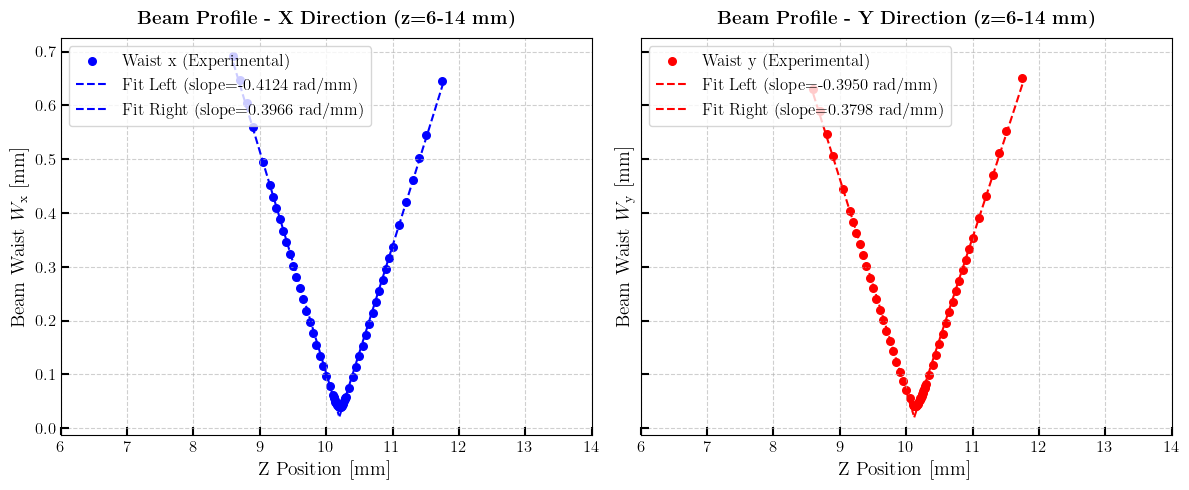

In [56]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251016_telescoping"
# Match both *mm_#001.txt and *m_#001.txt
file_list = sorted(
    [f for f in glob.glob(os.path.join(data_path, "*[m|mm]_#001.txt"))
     if "before lens" not in os.path.basename(f).lower() and
     float(os.path.basename(f).split('m')[0].strip()) <= 16],
    key=lambda f: float(os.path.basename(f).split('m')[0])
)
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    # Split on 'm' to handle both 'mm' and 'm'
    z_str = filename.split('m')[0].strip()
    try:
        z = float(z_str)
    except ValueError:
        print(f"Error: Invalid z value in filename {filename}. Skipping.")
        continue
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
                print(f"Processed {filename}: wx = {gaussian_dia_x}, wy = {gaussian_dia_y}")
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping line.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    # Convert diameters to radii (µm to mm)
    wx = gaussian_dia_x / 2 / 1000
    wy = gaussian_dia_y / 2 / 1000
    
    z_values.append(z)
    width_x.append(wx)
    width_y.append(wy)

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort data by z
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Filter data for z between 6 and 14 mm
mask = (z_values >= 8.5) & (z_values <= 11.75)
z_values_filtered = z_values[mask]
width_x_filtered = width_x[mask]
width_y_filtered = width_y[mask]

print(f"Processed {len(z_values_filtered)} valid data points in range 6-14 mm out of {len(z_values)} total files.")

# Print filtered data
for z, wx, wy in zip(z_values_filtered, width_x_filtered, width_y_filtered):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Linear fits for X direction (filtered range)
min_idx_x = np.argmin(width_x_filtered)
z_left_x = z_values_filtered[:min_idx_x]
width_x_left = width_x_filtered[:min_idx_x]
z_right_x = z_values_filtered[min_idx_x:]
width_x_right = width_x_filtered[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction (filtered range)
min_idx_y = np.argmin(width_y_filtered)
z_left_y = z_values_filtered[:min_idx_y]
width_y_left = width_y_filtered[:min_idx_y]
z_right_y = z_values_filtered[min_idx_y:]
width_y_right = width_y_filtered[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Create comparison plots in a single canvas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_filtered, width_x_filtered, color='b', label='Waist x (Experimental)', marker='o', s=30)
ax1.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
ax1.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile - X Direction (z=6-14 mm)}', fontsize=13.5, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_xlim(6, 14)

# Plot Width y comparison
ax2.scatter(z_values_filtered, width_y_filtered, color='r', label='Waist y (Experimental)', marker='o', s=30)
ax2.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
ax2.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile - Y Direction (z=6-14 mm)}', fontsize=13.5, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_xlim(6, 14)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_6-14mm.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()

Variable range fit (from z = 9.5mm to z = 11mm)

Processed 2mm_#001.txt: wx = 6194.43, wy = 6080.63
Processed 2.5mm_#001.txt: wx = 5917.65, wy = 5824.39
Processed 3mm_#001.txt: wx = 5616.55, wy = 5535.25
Processed 4mm_#001.txt: wx = 4997.37, wy = 4866.89
Processed 5mm_#001.txt: wx = 4328.79, wy = 4146.23
Processed 5.5mm_#001.txt: wx = 3969.91, wy = 3760.88
Processed 5.75mm_#001.txt: wx = 3785.49, wy = 3568.14
Processed 6mm_#001.txt: wx = 3599.19, wy = 3376.73
Processed 6.25mm_#001.txt: wx = 3406.52, wy = 3176.28
Processed 6.5mm_#001.txt: wx = 3199.9, wy = 2974.82
Processed 6.75mm_#001.txt: wx = 2992.04, wy = 2768.99
Processed 7mm_#001.txt: wx = 2782.59, wy = 2565.12
Processed 7.25mm_#001.txt: wx = 2568.45, wy = 2364.07
Processed 7.5mm_#001.txt: wx = 2348.17, wy = 2159.8
Processed 7.75mm_#001.txt: wx = 2126.03, wy = 1954.46
Processed 8mm_#001.txt: wx = 1906.73, wy = 1753.21
Processed 8.25mm_#001.txt: wx = 1690.22, wy = 1550.07
Processed 8.6mm_#001.txt: wx = 1383.71, wy = 1261.01
Processed 8.7mm_#001.txt: wx = 1295.47, wy = 1178.52
Pro

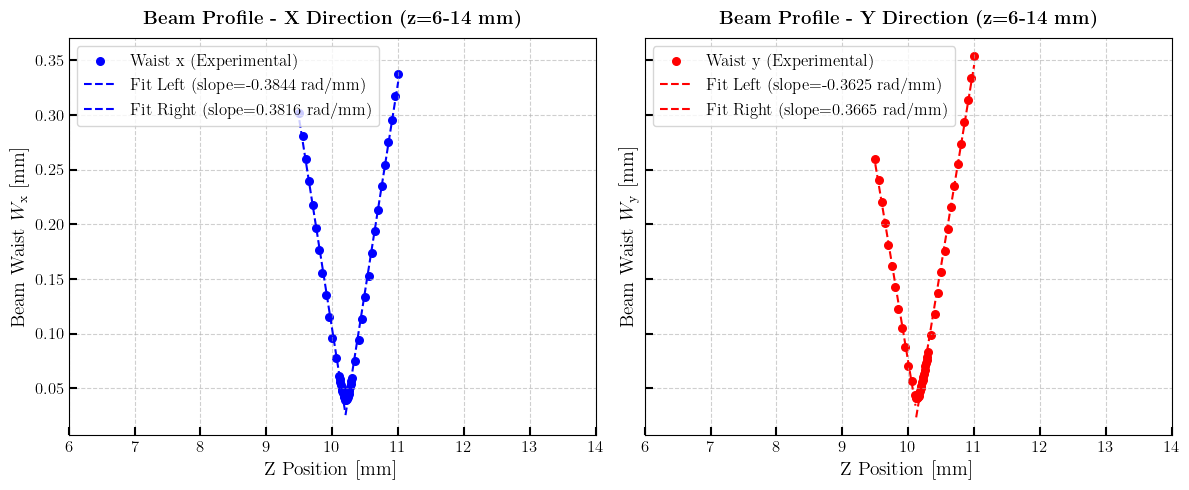

In [57]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251016_telescoping"
# Match both *mm_#001.txt and *m_#001.txt
file_list = sorted(
    [f for f in glob.glob(os.path.join(data_path, "*[m|mm]_#001.txt"))
     if "before lens" not in os.path.basename(f).lower() and
     float(os.path.basename(f).split('m')[0].strip()) <= 16],
    key=lambda f: float(os.path.basename(f).split('m')[0])
)
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    # Split on 'm' to handle both 'mm' and 'm'
    z_str = filename.split('m')[0].strip()
    try:
        z = float(z_str)
    except ValueError:
        print(f"Error: Invalid z value in filename {filename}. Skipping.")
        continue
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
                print(f"Processed {filename}: wx = {gaussian_dia_x}, wy = {gaussian_dia_y}")
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping line.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    # Convert diameters to radii (µm to mm)
    wx = gaussian_dia_x / 2 / 1000
    wy = gaussian_dia_y / 2 / 1000
    
    z_values.append(z)
    width_x.append(wx)
    width_y.append(wy)

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort data by z
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Filter data for z between 6 and 14 mm
mask = (z_values >= 9.5) & (z_values <= 11)
z_values_filtered = z_values[mask]
width_x_filtered = width_x[mask]
width_y_filtered = width_y[mask]

print(f"Processed {len(z_values_filtered)} valid data points in range 6-14 mm out of {len(z_values)} total files.")

# Print filtered data
for z, wx, wy in zip(z_values_filtered, width_x_filtered, width_y_filtered):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Linear fits for X direction (filtered range)
min_idx_x = np.argmin(width_x_filtered)
z_left_x = z_values_filtered[:min_idx_x]
width_x_left = width_x_filtered[:min_idx_x]
z_right_x = z_values_filtered[min_idx_x:]
width_x_right = width_x_filtered[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction (filtered range)
min_idx_y = np.argmin(width_y_filtered)
z_left_y = z_values_filtered[:min_idx_y]
width_y_left = width_y_filtered[:min_idx_y]
z_right_y = z_values_filtered[min_idx_y:]
width_y_right = width_y_filtered[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Create comparison plots in a single canvas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_filtered, width_x_filtered, color='b', label='Waist x (Experimental)', marker='o', s=30)
ax1.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
ax1.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile - X Direction (z=6-14 mm)}', fontsize=13.5, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_xlim(6, 14)

# Plot Width y comparison
ax2.scatter(z_values_filtered, width_y_filtered, color='r', label='Waist y (Experimental)', marker='o', s=30)
ax2.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
ax2.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile - Y Direction (z=6-14 mm)}', fontsize=13.5, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_xlim(6, 14)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_6-14mm.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()